# IBS 574 Python Homework 3

#### Add your name and the date your notebook was last updated

In [2]:
%reload_ext watermark
%watermark -a "Sydney Sunna" -d -t -u -n -z

Sydney Sunna 
last updated: 2020-02-11 14:10:52 Eastern Standard Time


#### Load libraries

In [3]:
import pandas as pd
import numpy as np
from sinfo import sinfo
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random

#### Load data
note: include test for this chunk from previous homework

In [4]:
countdata = "https://raw.githubusercontent.com/jessmrandall/IBS574Spring2020/master/data/countdata.csv"
counts = pd.read_csv(countdata, index_col = 0, sep = "\t")

#### Prepare data for PCA Analysis

In [9]:
counts_transpose = counts.T
len(counts_transpose) == 14
group = ['Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case']
counts_transpose['group'] = group
features = pd.Series(counts_transpose.columns)[0:14944]
feature_arr = counts_transpose.loc[:, features].values
target_arr = counts_transpose.loc[:, ['group']].values
fitted_features = StandardScaler().fit_transform(feature_arr)


#### Determine Principal Components
note: include test for this chunk from previous homework

In [8]:
pca = PCA(n_components=2)
random.seed(2136044)
pca=PCA(n_components = 2, random_state = 2136044)
principalComponents = pca.fit_transform(fitted_features)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])
principalDataframe.index = counts_transpose.index
targetDataframe = counts_transpose[['group']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

#### Graph the principal components by sample group

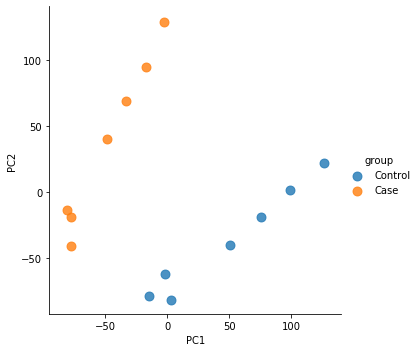

In [10]:
sns.lmplot (x= "PC1",y= "PC2",
           data = newDataframe,
           fit_reg = False, # not making a linear regression
           hue = "group",#color things by sample group
           legend = True, # put in a legend
           scatter_kws = {"s": 80}) 

#### Interpret the graph for your principal investigator using explained variance

In [12]:
#explained variance tells you how much variance is explained by each principal component (due to the fact that your samples are in a group)
#pca documentation in scikitlearn look up explained_variance_ratio for more info https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca.explained_variance_ratio_

#first number is represented by PC1 and the second one is PC2 hopefully PC1 explains far more variance than PC2 haha


array([0.39218002, 0.36808828])

Aproximately 39 % of the variability between these sample groups is explained by a sample being either a case or a control. Approximately 37 % can be attributed to another variable unaccounted for in the experimental design.

Between these two principal components, we can account for rouchly 80% of the variance in the data.

#### Report Session Information


In [13]:
sinfo()

-----
numpy       1.18.1
pandas      1.0.0
seaborn     0.10.0
sinfo       0.3.1
sklearn     0.22.1
-----
IPython             7.12.0
jupyter_client      5.3.4
jupyter_core        4.6.1
jupyterlab          1.2.6
notebook            6.0.3
-----
Python 3.8.1 (default, Jan  8 2020, 15:55:49) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.18362-SP0
8 logical CPU cores, Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
-----
Session information updated at 2020-02-11 14:25
